In [4]:
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
from cxr_analysis import load_results_from_log, get_cxr14_rocs_from_log

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# Loading reproduce-chexnet data from file
reproduce_chexnet_results_path = '../analysis_data/reproduce_chexnet_aucs.csv'
reproduce_chexnet_results = pd.read_csv(reproduce_chexnet_results_path, 
                                        index_col='LABEL', names=['LABEL','CHEXNET-ORIG', 'CHEXNET-REPRODUCE'],
                                        header=0)
reproduce_chexnet_results.index = reproduce_chexnet_results.index.str.upper()

In [8]:
# Specify log directory to pull results from
#log_base_dir = '/dfs/scratch0/jdunnmon/mmtl/results/cxr/archive'
log_base_dir = '/lfs/1/jdunnmon/repos/metal/logs/2019_04_29'
logs_to_load = {
                #'MTL-224':'baselines_04_13/baseline_chexnet_equivalent_results',
                #'MTL-224-NO-DRAIN-BASE': 'baselines_04_16/new_drain_data_without_slice',
                #'MTL-224-NO-DRAIN-HPS': 'baselines_04_16/new_drain_data_with_slice',
                #'MTL-224-DRAIN':'baselines_04_13/baseline_chexnet_equivalent_results_with_drain',
                #'MTL-512':'baselines_04_13/baseline_chexnet_equivalent_results_512', # GET WHEN FINISHED
                #'MTL-512-DRAIN':'baselines_04_13/baseline_chexnet_equivalent_results_with_drain_512',
                 'MTL-224-DRAIN-BASE': 'naive_no_slice_00_43_20',
                 'MTL-224-DRAIN-HPS': 'hps_drain_slice_cnn_07_49_02',
                 'MTL-224-DRAIN-SPS': 'slice_model_debug_23_59_42'
                }

# Loading logs
metrics = ['roc-auc','f1']
df_results_dict = {}
for metric in metrics:
    df_results_dict[metric] = reproduce_chexnet_results.copy()
for name, log in logs_to_load.items():
    # Loading all json logs
    results = load_results_from_log(os.path.join(log_base_dir,log))
    for metric in metrics:
        df_results_dict[metric] = get_cxr14_rocs_from_log(df_results_dict[metric], results['metrics'],
                                                         col_name=name, plot_metric=metric, load_slices=False)

In [10]:
df_results_dict['roc-auc'].round(3)

,CHEXNET-ORIG,CHEXNET-REPRODUCE,MTL-224-DRAIN-BASE,MTL-224-DRAIN-HPS,MTL-224-DRAIN-SPS
LABEL,,,,,
ATELECTASIS,0.816,0.809,0.812,0.813,0.818
CARDIOMEGALY,0.910,0.925,0.910,0.898,0.912
CONSOLIDATION,0.801,0.790,0.807,0.807,0.809
EDEMA,0.898,0.888,0.894,0.893,0.897
EFFUSION,0.884,0.864,0.882,0.882,0.884
EMPHYSEMA,0.923,0.937,0.922,0.897,0.919
FIBROSIS,0.829,0.805,0.830,0.804,0.825
HERNIA,0.901,0.916,0.923,0.906,0.928
INFILTRATION,0.708,0.734,0.707,0.711,0.708


In [29]:
# Plotting drain slice performance
# (1) trained w/o slice: main head on main task
# (2) trained w/slice: main head on slice task, slice head on slice task

from cxr_analysis import load_results_from_log, get_cxr14_rocs_from_log

models_to_plot = list(logs_to_load.keys())

slice_results_dict = {}
for metric in metrics:
    slice_results_dict[metric] = df_results_dict[metric][models_to_plot].copy()

df_slice = {}
for ky, log in logs_to_load.items():
    results = load_results_from_log(os.path.join(log_base_dir,log))
    if 'slice_metrics' in results.keys():
        slice_metrics = results['slice_metrics']['test']
        for metric in metrics:
            for head in slice_metrics:
                slice_results_dict[metric] = get_cxr14_rocs_from_log(slice_results_dict[metric], 
                                        slice_metrics[head], col_name=f"{ky}", plot_metric=metric, load_slices=True, head=head)

In [30]:
slice_results_dict['roc-auc']

,MTL-224-DRAIN-BASE,MTL-224-DRAIN-HPS,MTL-224-DRAIN-SPS
LABEL,,,
ATELECTASIS,0.812283,0.812774,0.818202
CARDIOMEGALY,0.909679,0.897938,0.912025
CONSOLIDATION,0.807349,0.806579,0.808957
EDEMA,0.893833,0.892921,0.897469
EFFUSION,0.882328,0.881757,0.883705
EMPHYSEMA,0.921724,0.896883,0.919203
FIBROSIS,0.829571,0.804213,0.824877
HERNIA,0.923217,0.906182,0.928077
INFILTRATION,0.707102,0.711297,0.707653


In [31]:
slice_results_dict['f1']

,MTL-224-DRAIN-BASE,MTL-224-DRAIN-HPS,MTL-224-DRAIN-SPS
LABEL,,,
ATELECTASIS,0.263204,0.249152,0.306255
CARDIOMEGALY,0.346495,0.271100,0.379061
CONSOLIDATION,0.002064,0.004103,0.012232
EDEMA,0.093496,0.009662,0.092437
EFFUSION,0.479649,0.451512,0.489254
EMPHYSEMA,0.444970,0.366048,0.363636
FIBROSIS,0.075949,0.027322,0.079602
HERNIA,0.000000,0.000000,0.000000
INFILTRATION,0.205384,0.171820,0.101387


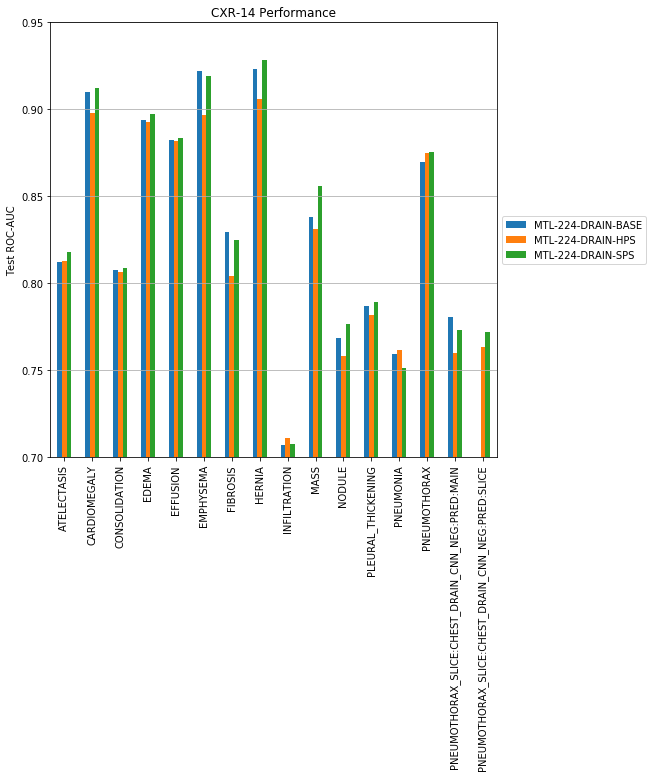

In [66]:
import matplotlib.pyplot as plt
save_res = True
plot_metric = 'roc-auc'
df_plot = slice_results_dict[plot_metric][models_to_plot]
# Dropping ind head
df_plot = df_plot[~df_plot.index.str.contains(':IND:')]
# Dropping BASE slice
df_plot = df_plot[~df_plot.index.str.contains(':BASE:')]
f = plt.figure('ROC-AUC',figsize=(8,8))
plt.title('CXR-14 Performance', color='black')
plt.ylabel(f'Test {plot_metric.upper()}')
plot = df_plot.plot(kind='bar', ax=f.gca(),rot=90)
plot.grid(zorder=0,axis='y',which='major')
plot.set_xlabel('')
if plot_metric == 'roc-auc':
    plot.set_ylim([0.7, 0.95])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
if save_res:
    plt.savefig(f'../figures/04_30_2019/CXR14-performance-{plot_metric}-cnn-drain-ps.png',format='png', bbox_inches='tight')
plt.show()

In [55]:
df_plot[~df_plot.index.str.contains(slices_to_plot[0])]

,MTL-224-DRAIN-BASE,MTL-224-DRAIN-HPS,MTL-224-DRAIN-SPS
LABEL,,,
ATELECTASIS,0.812283,0.812774,0.818202
CARDIOMEGALY,0.909679,0.897938,0.912025
CONSOLIDATION,0.807349,0.806579,0.808957
EDEMA,0.893833,0.892921,0.897469
EFFUSION,0.882328,0.881757,0.883705
EMPHYSEMA,0.921724,0.896883,0.919203
FIBROSIS,0.829571,0.804213,0.824877
HERNIA,0.923217,0.906182,0.928077
INFILTRATION,0.707102,0.711297,0.707653
